In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
import tensorflow as tf

In [3]:
x="Hi hello how are you"
print(len(x.split()))

5


In [5]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
word_tokenize(x)

['Hi', 'hello', 'how', 'are', 'you']

In [6]:
url="https://raw.githubusercontent.com/Sooryak12/FakeReviewDetectionLSTM/master/selected.txt"


In [7]:
df=pd.read_csv(url,delimiter="\t")
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [31]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [32]:
df["PRODUCT_CATEGORY"].value_counts()

Tools                     700
Books                     700
Jewelry                   700
PC                        700
Toys                      700
Automotive                700
Furniture                 700
Electronics               700
Musical Instruments       700
Camera                    700
Lawn and Garden           700
Home Entertainment        700
Health & Personal Care    700
Home Improvement          700
Grocery                   700
Beauty                    700
Shoes                     700
Wireless                  700
Sports                    700
Outdoors                  700
Kitchen                   700
Apparel                   700
Office Products           700
Home                      700
Video Games               700
Pet Products              700
Baby                      700
Luggage                   700
Video DVD                 700
Watches                   700
Name: PRODUCT_CATEGORY, dtype: int64

In [11]:
df["LABEL"]=df["LABEL"].replace(['__label2__','__label1__'],['0','1'])


In [12]:
dfs=df[["REVIEW_TEXT","LABEL","PRODUCT_CATEGORY"]]
dfs = dfs.rename(columns={'REVIEW_TEXT': 'reviews',"LABEL":"label","PRODUCT_CATEGORY":"cat"})

In [35]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  21000 non-null  object
 1   label    21000 non-null  object
 2   cat      21000 non-null  object
dtypes: object(3)
memory usage: 492.3+ KB


In [13]:
dfs["reviews"]=dfs["reviews"].apply(lambda x:x.lower())
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("\s+", " ", x))

In [29]:
dfs["label"].value_counts()

0    10500
1    10500
Name: label, dtype: int64

The Data is Unbiased

In [14]:
dfs.head()

,reviews,label,cat
0,when least you think so this product will save...,1,PC
1,lithium batteries are something new introduced...,1,Wireless
2,i purchased this swing for my baby she is mont...,1,Baby
3,i was looking for an inexpensive desk calcolat...,1,Office Products
4,i only use it twice a week and the results are...,1,Beauty


In [15]:
"not" in stopwords

True

In [14]:
#nltk.download('punkt')
def stop(text):
    clean_sent =[]
    for w in word_tokenize(text):
        if not w in stopwords:
            clean_sent.append(w)
    return (" ".join(clean_sent))

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):

    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))


In [15]:
dfs["reviews"]=dfs["reviews"].apply(lemmatize)
dfs["reviews"]=dfs["reviews"].apply(stop)

In [18]:
dfs["reviews"][10]

'unfortunately work made sick throw two time tried'

In [16]:
dfs["length"]=dfs["reviews"].apply(lambda x: len(x.split())) 

In [20]:
dfs["length"].head()

0    10
1    40
2    22
3    21
4    27
Name: length, dtype: int64

In [21]:
dfs["reviews"][0]

'least think product save day keep around case need something'

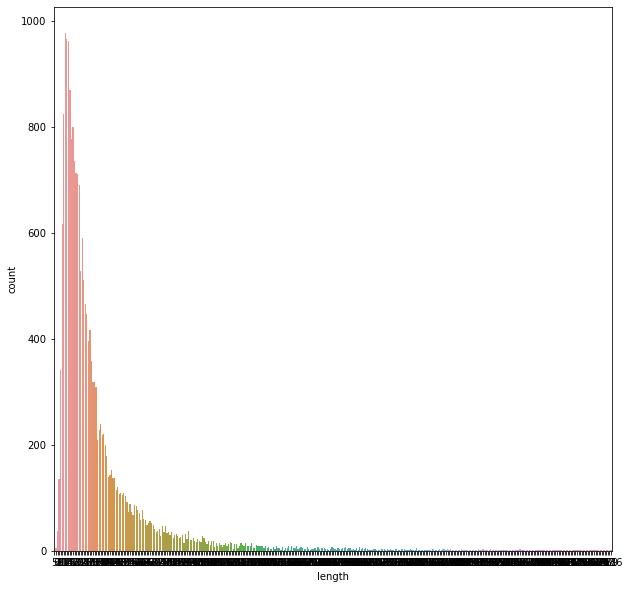

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(dfs["length"])
plt.show()

In [23]:
np.mean(dfs["length"])

35.187714285714286

We see that there are many outliers and the data is heavily left skewed.So we have to do much more analysis to select the proper lenth for the text to embedd.

In [24]:
txt=" mean:{} \n median:{} \n maximum length:{} \n minimum length:{}".format(np.mean(dfs["length"]),np.median(dfs["length"]),np.max(dfs["length"]),np.min(dfs["length"]))

In [25]:
print(txt)

 mean:35.187714285714286 
 median:22.0 
 maximum length:1436 
 minimum length:5


In [26]:
def category(x):
    if 0<x<11:
        return 5
    elif 10<x<21:
        return 15
    elif 20<x<31:
        return 25
    elif 30<x<41:
        return 35
    elif 40<x<50:
        return 45
    elif 50<x<61:
        return 55
    elif 60<x<101:
        return 80
    elif 100<x<301:
        return 150
    elif 300<x<601:
        return 450
    elif 600<x<1001:
        return 800
    elif 1000<x<1501:
        return 1250
    

In [27]:
dfs["textcat"]=dfs["length"].apply(category)

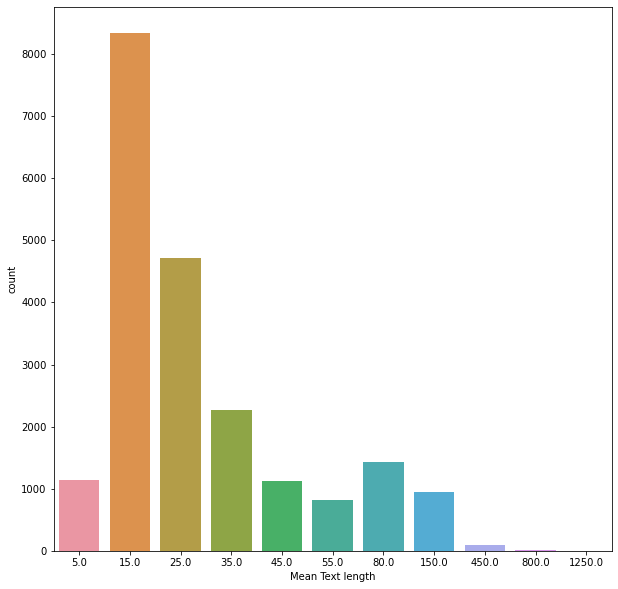

In [28]:
plt.figure(figsize=(10,10))
ax=sns.countplot(dfs["textcat"])
ax.set(xlabel="Mean Text length")
plt.show()

#### To Find an apt length for the text:

In [29]:
(15+25+35)/3

25.0

Ideal Text size will be of 30-40

In [30]:
c=0
for i in dfs["length"]:
    if 700<i:
      c+=1
print(c)

7


Texts with text size >700 is just 7 .We can remove them.
The above mentioned values are the index of outliers.

In [31]:
c=0
for i in dfs["length"]:
    if 40>i>1:
      c+=1
print(c)

16321


In [32]:
len(dfs["length"])

21000

In [33]:
19921/21000

0.9486190476190476

In [34]:
16321/21000

0.7771904761904762

In [35]:
19030/21000

0.9061904761904762

90% of the data lies with text size between 1 and 70.So we can remove all the other data.
77% of the data lies with text size between 40.As LSTM takes long time to train .This data is enough i guess.

In [36]:
dfs.columns

Index(['reviews', 'label', 'cat', 'length', 'textcat'], dtype='object')

In [37]:
dfs.head()

,reviews,label,cat,length,textcat
0,least think product save day keep around case ...,1,PC,10,5.0
1,lithium battery something new introduced marke...,1,Wireless,40,35.0
2,purchased swing baby month ha pretty much grow...,1,Baby,22,25.0
3,wa looking inexpensive desk calcolatur work do...,1,Office Products,21,25.0
4,use twice week result great used teeth whiteni...,1,Beauty,27,25.0


In [38]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  21000 non-null  object 
 1   label    21000 non-null  object 
 2   cat      21000 non-null  object 
 3   length   21000 non-null  int64  
 4   textcat  20891 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 820.4+ KB


In [17]:
dfs=dfs[dfs["length"]<41]

In [18]:
dfs.reset_index(inplace=True)

we removed the outlier texts.

In [19]:
test_dfs=dfs

In [41]:
#dfs=test_dfs

In [42]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 20998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  16461 non-null  object 
 1   label    16461 non-null  object 
 2   cat      16461 non-null  object 
 3   length   16461 non-null  int64  
 4   textcat  16461 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 771.6+ KB


In [20]:
dfs["label"]=dfs["label"].astype(np.float32)

In [21]:
dfs["cat"].value_counts()

Jewelry                   648
Shoes                     633
Apparel                   622
Watches                   600
Office Products           584
Furniture                 580
Automotive                573
Wireless                  567
Home                      567
Musical Instruments       561
Outdoors                  556
Tools                     554
Sports                    554
Toys                      548
Lawn and Garden           546
Luggage                   545
Health & Personal Care    545
Home Improvement          539
Grocery                   537
Baby                      536
Beauty                    536
Video Games               534
Electronics               532
Pet Products              526
Kitchen                   524
PC                        523
Video DVD                 510
Camera                    505
Home Entertainment        459
Books                     417
Name: cat, dtype: int64

In [45]:
dfs["label"].value_counts()

1.0    8803
0.0    7658
Name: label, dtype: int64

From the Previous 2 Infos We can see that the data is still unbiased to a great extent and we are good to go

In [33]:
dfs["reviews"][0]

'least think product save day keep around case need something'

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
dfs2=dfs #Taking an Copy of Dataset for debugging

In [24]:
df_train,df_test,Ytrain,Ytest = train_test_split(dfs["reviews"],dfs["label"], test_size=0.2, random_state=101)

In [25]:
df_train[0]

'least think product save day keep around case need something'

In [26]:
df_train

14372    love let driver know peaceful buddhist live st...
3678     finished reading certainly glad purchased book...
11805    love construction quality drawer drawer open s...
5105     juligo led headlamp comfortable wear cast nice...
381      stand paper towel soft feel like toilet paper ...
                               ...                        
2623     nothing like quality bed happy material though...
12363    bought shoe size chrat said size u eur receive...
5695     good price good size bought student sure love ...
8006     great game perfect beginner even veteran still...
13151    make short travel want organized buy today rig...
Name: reviews, Length: 13168, dtype: object

In [27]:
vocab={'pad':0,"unk":1}
for review in dfs["reviews"]:
    
    for word in review.split():
        if word not in vocab:
            vocab[word]=len(vocab)
print(len(vocab))

17189


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [30]:
df_train

14372    love let driver know peaceful buddhist live st...
3678     finished reading certainly glad purchased book...
11805    love construction quality drawer drawer open s...
5105     juligo led headlamp comfortable wear cast nice...
381      stand paper towel soft feel like toilet paper ...
                               ...                        
2623     nothing like quality bed happy material though...
12363    bought shoe size chrat said size u eur receive...
5695     good price good size bought student sure love ...
8006     great game perfect beginner even veteran still...
13151    make short travel want organized buy today rig...
Name: reviews, Length: 13168, dtype: object

In [31]:
MAX_VOCAB_SIZE=30000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE,oov_token="<OOV>")
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [44]:
df_test

4735     pillow really nice wa looking like long time f...
9425     music lover bose sounddock finally found place...
5314     granddaughter love tune help find pitch sing t...
2055     bought price considering paying full synthetic...
7112     may expensive chair home worth sturdy keep tip...
                               ...                        
11499    listen typo blog say need poor los room starte...
11314    great case slimmer design due narrow profile e...
15637    game came everything needed br game play well ...
12798    total quality great feature great fit last yea...
5567     wonderful love much would never imagine someth...
Name: reviews, Length: 3293, dtype: object

In [45]:
df_test.loc[4735]

'pillow really nice wa looking like long time finally founded amazon comfortable soft happy thinking buy future looking pillow right place must give try like'

In [39]:
sequences_test[0
               ]

[645,
 10,
 23,
 2,
 58,
 6,
 62,
 16,
 485,
 1,
 167,
 79,
 193,
 60,
 495,
 30,
 799,
 58,
 645,
 71,
 202,
 229,
 98,
 175,
 6]

In [37]:
word2idx = tokenizer.word_index
V = len(word2idx)

In [38]:
word2idx

{'<OOV>': 1,
 'wa': 2,
 'great': 3,
 'one': 4,
 'good': 5,
 'like': 6,
 'love': 7,
 'product': 8,
 'br': 9,
 'really': 10,
 'work': 11,
 'well': 12,
 'use': 13,
 'would': 14,
 'quality': 15,
 'time': 16,
 'get': 17,
 'look': 18,
 'ha': 19,
 'price': 20,
 'bought': 21,
 'easy': 22,
 'nice': 23,
 'much': 24,
 'fit': 25,
 'little': 26,
 'recommend': 27,
 'got': 28,
 'also': 29,
 'buy': 30,
 'make': 31,
 'perfect': 32,
 'made': 33,
 'used': 34,
 'even': 35,
 'doe': 36,
 'watch': 37,
 'day': 38,
 'size': 39,
 'need': 40,
 'thing': 41,
 'light': 42,
 'lot': 43,
 'year': 44,
 'better': 45,
 'bag': 46,
 'color': 47,
 'best': 48,
 'small': 49,
 'using': 50,
 'go': 51,
 'back': 52,
 'put': 53,
 'still': 54,
 'way': 55,
 'set': 56,
 'first': 57,
 'looking': 58,
 'feel': 59,
 'happy': 60,
 'keep': 61,
 'long': 62,
 'could': 63,
 'new': 64,
 'case': 65,
 'pretty': 66,
 'want': 67,
 'problem': 68,
 'sound': 69,
 'old': 70,
 'right': 71,
 'come': 72,
 'two': 73,
 'battery': 74,
 'purchase': 75,
 'ite

In [25]:
len(word2idx)

15598

In [39]:
print(len(df_train[0].split()),len(sequences_train[0]))

10 12


In [40]:
print(df_train[0])
print(sequences_train[0])
print(word2idx["least"])
print(word2idx["save"])

least think product save day keep around case need something
[7, 448, 1171, 88, 8468, 6385, 549, 1580, 6386, 1489, 5269, 461]
381
414


### the Word Least has an index no :  but this number is not there in sequence and the length is also varying.
### No shuffling is done
### discreprency is noted

In [29]:
print(df_train[1])
print(sequences_train[1])
print(len(df_train[1]))
print(len(sequences_train[1]))
print(word2idx["built"])
print(word2idx["sensor"])

lithium battery something new introduced market average developing cost relatively high stallion compromise quality provides u best low cost br many built technical assistant act like sensor particular fort battery keep phone charged work every voltage high voltage never risked
[1300, 449, 770, 244, 77, 95, 12, 1202, 22, 1013, 716, 94, 449, 1229]
278
14
410
1612


In [64]:
print(df_train[4])
print(sequences_train[4])
print(word2idx["least"])
print(word2idx["day"])
print(len(df_train[10].split()))
print(len(sequences_train[10]))

use twice week result great used teeth whitening solution result would use least three time week keep using potency solution also technique tray keep everything teeth mouth
[274, 503, 1141, 193, 59, 6, 2730, 503, 274, 503, 1141, 115, 564, 1673, 36, 140, 67, 503, 1141, 636, 503, 1141, 2355, 157, 1100, 374, 148]
381
38
8
26


In [32]:
print(df_train[5])
print(sequences_train[5])
print(len(df_train[5].split()),len(sequences_train[5]))
print(word2idx["sure"])


sure supposed would recommend little research culture using pipe plan giving gift using
[28, 160, 108, 152, 25, 40, 8471, 42, 676, 3365, 8472, 1542, 17, 1230, 5271, 10, 53, 610, 182]
13 19
112


In [65]:

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)


T = data_train.shape[1]

Shape of data train tensor: (13168, 40)


In [66]:
print(df_train[0])
print(data_train[0])

least think product save day keep around case need something
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    7  448 1171   88 8468 6385  549 1580 6386 1489 5269  461]


In [67]:

data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (3293, 40)


In [68]:
data_test

array([[    0,     0,     0, ...,    98,   175,     6],
       [    0,     0,     0, ...,   691, 12498,   345],
       [    0,     0,     0, ...,  4393,  2389,  2599],
       ...,
       [    0,     0,     0, ...,   343,  4485,     7],
       [    0,     0,     0, ...,     8,   168,   488],
       [    0,     0,     0, ...,   113,   283,   167]])

## Model 1 with Basic LSTM

In [69]:
# Model  1

# embeding dimensionality
D = 20

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(15,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x=Dense(64,activation="relu")(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [70]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
print('Training model....')
r=model.fit(data_train, Ytrain,batch_size=64,epochs=10,validation_data=(data_test,Ytest))

Training model....
Train on 13168 samples, validate on 3293 samples
Epoch 1/10
13168/13168 [==============================] - 6s 475us/sample - loss: 0.6933 - accuracy: 0.4683 - val_loss: 0.6863 - val_accuracy: 0.4534
Epoch 2/10
13168/13168 [==============================] - 4s 341us/sample - loss: 0.6680 - accuracy: 0.5591 - val_loss: 0.6606 - val_accuracy: 0.6134
Epoch 3/10
13168/13168 [==============================] - 5s 351us/sample - loss: 0.6235 - accuracy: 0.6962 - val_loss: 0.6613 - val_accuracy: 0.6034
Epoch 4/10
13168/13168 [==============================] - 5s 342us/sample - loss: 0.5961 - accuracy: 0.7602 - val_loss: 0.6622 - val_accuracy: 0.6058
Epoch 5/10
13168/13168 [==============================] - 5s 359us/sample - loss: 0.5817 - accuracy: 0.7939 - val_loss: 0.6630 - val_accuracy: 0.6046
Epoch 6/10
13168/13168 [==============================] - 5s 345us/sample - loss: 0.5718 - accuracy: 0.8189 - val_loss: 0.6655 - val_accuracy: 0.6083
Epoch 7/10
13168/13168 [========

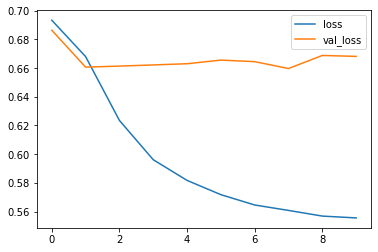

In [71]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

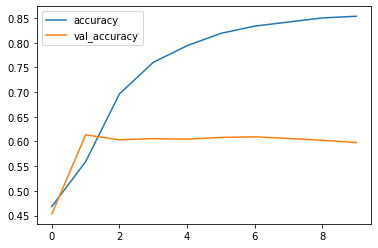

In [72]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [73]:
#Without batch_size:
#Epoch 10/10
#13168/13168 [==============================] - 10s 788us/sample - loss: 0.1205 - accuracy: 0.9572 - val_loss: 1.3333 - val_accuracy: 0.5864
#with batch_size=64:
#Epoch 10/10
#13168/13168 [==============================] - 4s 339us/sample - loss: 0.0331 - accuracy: 0.9891 - val_loss: 2.0885 - val_accuracy: 0.5858


## Model 2 With Bidirectional LSTMs

In [74]:

#Model 2
model2=tf.keras.Sequential([
tf.keras.layers.Embedding(V+1,64),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid")])


In [75]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
print('Training model....')
r=model2.fit(data_train, Ytrain,batch_size=64,epochs=10,validation_data=(data_test,Ytest))

Training model....
Train on 13168 samples, validate on 3293 samples
Epoch 1/10
13168/13168 [==============================] - 22s 2ms/sample - loss: 0.6805 - accuracy: 0.5260 - val_loss: 0.6630 - val_accuracy: 0.5506
Epoch 2/10
13168/13168 [==============================] - 23s 2ms/sample - loss: 0.6374 - accuracy: 0.6642 - val_loss: 0.6598 - val_accuracy: 0.5824
Epoch 3/10
13168/13168 [==============================] - 33s 2ms/sample - loss: 0.6065 - accuracy: 0.7357 - val_loss: 0.6661 - val_accuracy: 0.6092
Epoch 4/10
13168/13168 [==============================] - 32s 2ms/sample - loss: 0.5912 - accuracy: 0.7728 - val_loss: 0.6671 - val_accuracy: 0.6040
Epoch 5/10
13168/13168 [==============================] - 33s 2ms/sample - loss: 0.5840 - accuracy: 0.7899 - val_loss: 0.6712 - val_accuracy: 0.6098
Epoch 6/10
13168/13168 [==============================] - 17s 1ms/sample - loss: 0.5752 - accuracy: 0.8089 - val_loss: 0.6741 - val_accuracy: 0.6055
Epoch 7/10
13168/13168 [==============

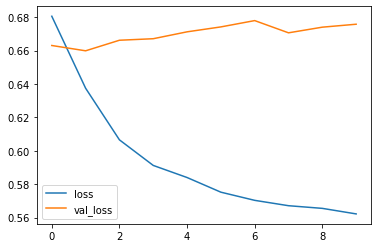

In [76]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

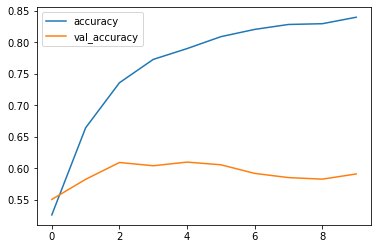

In [77]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## To Debug the Anomaly in the Tokenizer.Im testing it here.

In [84]:
sequences_train2[0]

[2, 3, 4, 6, 5]

In [85]:
for i in range(len(test1)):
     print(test1[i])
     print(sequences_train2[i])


I am a good boy
[2, 3, 4, 6, 5]
I am a bad boy
[2, 3, 4, 7, 5]
I dont like brinjal
[2, 8, 9, 10]


In [ ]:
#Tokenizer is working fine over here

In [54]:
dfs["tester"]=df["REVIEW_TEXT"][0:12]

In [55]:
dfs["tester"]

0        When least you think so, this product will sav...
1        Lithium batteries are something new introduced...
2        I purchased this swing for my baby. She is 6 m...
3        I was looking for an inexpensive desk calcolat...
4        I only use it twice a week and the results are...
                               ...                        
20995                                                  NaN
20996                                                  NaN
20997                                                  NaN
20998                                                  NaN
20999                                                  NaN
Name: tester, Length: 21000, dtype: object

In [56]:
len(dfs["tester"])

21000

In [57]:
dfs["tester"].dropna(inplace=True)

In [58]:
len(dfs["tester"])

12

In [59]:
MAX_VOCAB_SIZE=20000
tokenizer3= Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer3.fit_on_texts(dfs["tester"])
sequences_train3 = tokenizer3.texts_to_sequences(dfs["tester"])
#sequences_test = tokenizer.texts_to_sequences(df_test)
word2idx3=tokenizer3.word_index

In [60]:
for i in range(len(dfs["tester"])):
     print(dfs["tester"][i])
     print(sequences_train3[i])

When least you think so, this product will save the day. Just keep it around just in case you need it for something.
[32, 33, 11, 34, 16, 8, 80, 35, 81, 2, 36, 37, 38, 1, 82, 37, 12, 83, 11, 39, 1, 9, 40]
Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.
[84, 85, 17, 40, 86, 87, 12, 2, 88, 41, 89, 90, 42, 7, 43, 44, 14, 91, 45, 92, 18, 93, 4, 94, 95, 46, 2, 96, 19, 3, 97, 42, 98, 41, 17, 16, 47, 12, 99, 100, 101, 15, 102, 48, 3, 103, 12, 22, 104, 105, 2, 106, 49, 13, 107, 108, 50, 4, 1, 51, 19, 109, 52, 4, 3, 44, 52, 7, 110, 111]
I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and

In [61]:
print(word2idx3["least"])

33


In [62]:
print(word2idx3["purchased"])

112


In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

## First Model.
Found Anomaly in Tokenizing.
Models with Training Accuracy 84% and Testing 59%.

In [75]:
doc = "In the-state-of-art of the NLP field, Embedding is the \
success way to resolve text related problem and outperform \
Bag of Words ( BoW ). Indeed, BoW introduced limitations \
large feature dimension, sparse representation etc."
x="This kettle is a gift for my daughter. She said that it is easy to use. She likes the design of it, so nice and neat."
y="I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money."
count_vec = TfidfVectorizer(max_features=5000)
count_occurs = count_vec.fit_transform([doc,x,y])


In [76]:
v=count_occurs.toarray()

In [77]:
v

array([[0.09905018, 0.16770653, 0.        , 0.16770653, 0.        ,
        0.33541307, 0.        , 0.        , 0.        , 0.        ,
        0.16770653, 0.        , 0.        , 0.        , 0.16770653,
        0.16770653, 0.16770653, 0.16770653, 0.        , 0.        ,
        0.        , 0.        , 0.16770653, 0.16770653, 0.16770653,
        0.09905018, 0.        , 0.        , 0.16770653, 0.        ,
        0.16770653, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16770653, 0.        , 0.29715054, 0.        , 0.16770653,
        0.        , 0.16770653, 0.        , 0.16770653, 0.16770653,
        0.16770653, 0.        , 0.        , 0.        , 0.        ,
        0.16770653, 0.16770653, 0.16770653, 0.        , 0.16770653,
        0.        , 0.29715054, 0.        , 0.        , 0.        ,
        0.12754514, 0.        , 0.        , 0.        , 0.16770653,
        0.        , 0.16770653, 0.        ],
   

In [78]:
len(v[0])

73

In [79]:
count_vec.get_feature_names()

['and',
 'art',
 'baby',
 'bag',
 'beautiful',
 'bow',
 'but',
 'colors',
 'daughter',
 'design',
 'dimension',
 'doesn',
 'don',
 'easy',
 'embedding',
 'etc',
 'feature',
 'field',
 'for',
 'gift',
 'grown',
 'has',
 'in',
 'indeed',
 'introduced',
 'is',
 'it',
 'kettle',
 'large',
 'likes',
 'limitations',
 'lot',
 'loud',
 'love',
 'money',
 'months',
 'much',
 'my',
 'neat',
 'nice',
 'nlp',
 'now',
 'of',
 'out',
 'outperform',
 'pretty',
 'problem',
 'purchased',
 'related',
 'representation',
 'resolve',
 'said',
 'settings',
 'she',
 'so',
 'sparse',
 'state',
 'success',
 'swing',
 'text',
 'that',
 'the',
 'think',
 'this',
 'though',
 'to',
 'use',
 'very',
 'was',
 'way',
 'well',
 'words',
 'worth']

In [72]:
len(count_vec.get_feature_names())

3

In [56]:
for word, count in zip(count_occurs.toarray().tolist()[0],count_vec.get_feature_names()):
                       print(word)
                       print(count)

1
and
1
art
1
bag
2
bow
1
dimension
1
embedding
1
etc
1
feature
1
field
1
in
1
indeed
1
introduced
1
is
1
large
1
limitations
1
nlp
3
of
1
outperform
1
problem
1
related
1
representation
1
resolve
1
sparse
1
state
1
success
1
text
3
the
1
to
1
way
1
words


In [50]:
print(count_occurs)

  (0, 9)	1
  (0, 26)	3
  (0, 23)	1
  (0, 16)	3
  (0, 1)	1
  (0, 15)	1
  (0, 8)	1
  (0, 5)	1
  (0, 12)	1
  (0, 24)	1
  (0, 28)	1
  (0, 27)	1
  (0, 21)	1
  (0, 25)	1
  (0, 19)	1
  (0, 18)	1
  (0, 0)	1
  (0, 17)	1
  (0, 2)	1
  (0, 29)	1
  (0, 3)	2
  (0, 10)	1
  (0, 11)	1
  (0, 14)	1
  (0, 13)	1
  (0, 7)	1
  (0, 4)	1
  (0, 22)	1
  (0, 20)	1
  (0, 6)	1


In [ ]:
count_occur_df = pd.DataFrame(
    (count, word) for word, count in
     zip(count_occurs.toarray().tolist()[0], 
    count_vec.get_feature_names()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()